In [ ]:
%load_ext nb_black

In [15]:
import pandas as pd 
import numpy as np
import tensorflow
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import plotly.express as px

In [16]:
data = pd.read_csv("student-mat.csv", sep=";")

Importing sample student data and selecting primary non-binary attributes to model data

In [17]:
data = data[["G1","G2","G3","studytime","failures","absences","age"]]

We are trying to predict final grade ("G3"), which is scored on a scale from 1-20. Obviouisly we don't want to include that variable that we are trying to predict within our regression so two arrays are created. 

In [18]:
predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [19]:
linear = linear_model.LinearRegression()

Using first period grade("G1"), second period grade("G2"), attendance, studytime, and number of past failures per student we could account a % of the variance. 

In [20]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8110106185033128


score_predict = linear.predict(x_test)
for i in range(len(score_predict)):
    print(score_predict[i], x_test[i], y_test[i])

with open("studentscore.pickle", "wb" ) as file:
    pickle.dump(linear, file)

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [22]:
average_accuracy = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linear.fit(x_train, y_train)
    average_accuracy += linear.score(x_test,y_test)
    print(linear.score(x_test,y_test))
print(average_accuracy/10)

0.8869109458274645
0.8388121511530093
0.9407512863941276
0.8589583206258578
0.8069445844719331
0.8646226265564623
0.7699669571210386
0.6963437868255585
0.6561546265547935
0.8516797085947195
0.8171144994124964


In [23]:
import plotly.graph_objects as go
sampleChart = go.Figure()

def create_trace(chartname, predictions, y_test, color):
    chartname.add_trace(go.Scatter(
        x = predictions,
        y = y_test,
        mode = 'markers',
        marker_color = color
    ))

In [24]:
colors = ['#00b6d6', '#00a7ce', '#0098c6', '#0088be', '#0079b6', '#006aae', '#015ba5', '#014c9d', '#013d95', '#012e8d', '#011e85', '#010f7d', '#010075']
i = 0

average_accuracy = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linear.fit(x_train, y_train)
    acc = linear.score(x_test,y_test)
    average_accuracy += acc
    predictions = linear.predict(x_test)
    create_trace(sampleChart, predictions, y_test, colors[i])
    i += 1


After using K-Folds as cross validation we accounted for 81.7% of the variance with our predictor.

In [25]:
print(average_accuracy/10)

0.8171144994124964


In [26]:
sampleChart.update_layout(
    title = "Actual vs Predicted Scores",
    xaxis_title = "Predicted Scores",
    yaxis_title = 'Actual Scores'
)
sampleChart.show()

PNG image since github cannot displya interactive plotly charts. 

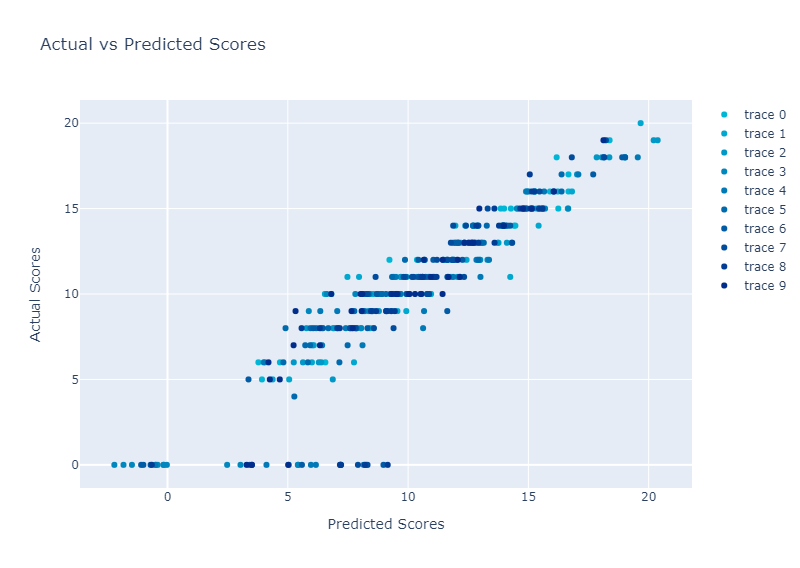

In [27]:
from IPython.display import Image
Image(filename='C:\\Users\\ventu\Python Projects\\Plot.png')

You can find the interactive version of the chart at https://plot.ly/~venturizhou/5/#/

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

rfChart = go.Figure()

colors = ['#00b6d6', '#00a7ce', '#0098c6', '#0088be', '#0079b6', '#006aae', '#015ba5', '#014c9d', '#013d95', '#012e8d', '#011e85', '#010f7d', '#010075']
i = 0

average_accuracy = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(x_train, y_train)
    acc = rf.score(x_test,y_test)
    average_accuracy += acc
    predictions = rf.predict(x_test)
    create_trace(rfChart, predictions, y_test, colors[i])
    i += 1

In [34]:
Image(filename='RFPlot.png')
rfChart.show()

R Squared of random forest regressor

In [31]:
average_accuracy/10

0.8656561499414313